# An Intuitive Investigation and Benchmark of Classification Algorithms

<b>Author</b>: Ian Xuan Xiao
<b>LinkedIn</b>: https://ca.linkedin.com/in/ianxiao
<b>Blog</b>: http://datasciensediary.tumblr.com/

<hr>

<b>Motivation</b>: To help others and myself to gain an intuitive understanding of how machine learning classifier works by visualizing boundary functions and comparing key performance indicators

<b>Use Case</b>: Predicting self driving car speed

<b>Dataset</b>: Target variable is speed (fast / slow) of self driving car using features, such as bumpiness and slope of the road

<b>Classifier</b>: Gaussian Naive Bayes, SVM, Adaboost, Random Forest, and KNN

<b>Insight</b>: 
- Training/prediction time
- Prediction accuracy
- Visualization of decision boundary

<hr>

## Create self driving car data points 

In [38]:
from sklearn.naive_bayes import GaussianNB

from prep_terrain_data import makeTerrainData
from class_vis import prettyPicture, output_image

import numpy as np
import pylab as pl

### Create training and test sets; total data is split into 75% training and 25% testing
### Target = Fast / Slow, Features = random values of bumpiness and slope
features_train, labels_train, features_test, labels_test = makeTerrainData()

### the training data (features_train, labels_train) have both "fast" and "slow" points mixed
### in together--separate them so we can give them different colors in the scatterplot,
### and visually identify them
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]


## Train a Gaussian Naive Bayes model and visualize the boundary function

Training time:  0.000977993011475 s
Prediction time:  0.001 s
GNB accuracy: 0.884 



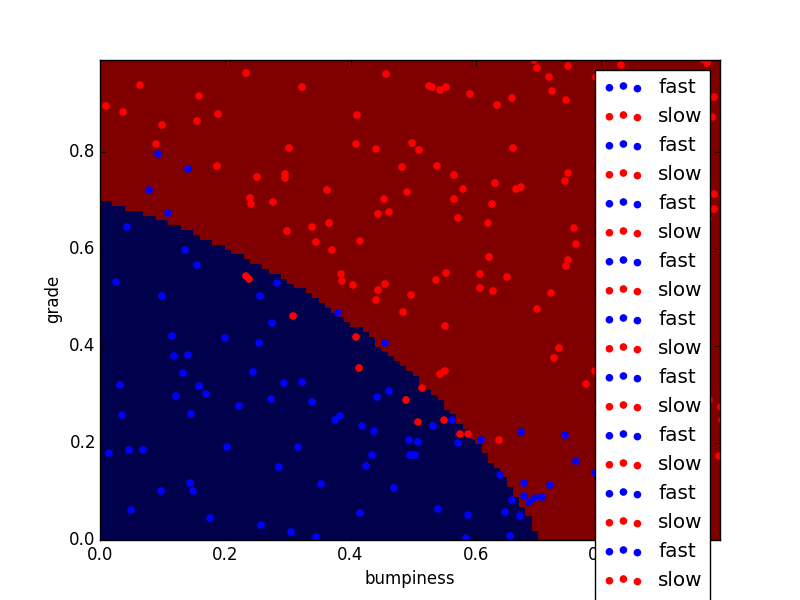

In [40]:
from ClassifyNB import classify
from time import time
from sklearn.metrics import accuracy_score

clf = classify(features_train, labels_train)

t0 = time()
clf.fit(features_train, labels_train)

t1 = time()
pred = clf.predict(features_test)

###Use the classifier based on training data to make prediction
pred = clf.predict(features_test)

###Compare test labels of fast and slow to prediction using classifier
accuracy = accuracy_score(labels_test, pred)

pred_time = round(time()-t1, 3)

print "Training time: ", t1-t0, "s"
print "Prediction time: ", pred_time, "s"

accuracy = accuracy_score(labels_test, pred)
print "GNB accuracy:", accuracy, "\n" 

### draw the decision boundary with the text points overlaid by using function in class_vis.py
prettyPicture(clf, features_test, labels_test)

from IPython.display import Image
Image(filename ="test.png")


## Try using Support Vector Machine (SVM)

1. Use SVM to define a linear bountry function with the same set of training / test data from above

Training time:  0.00377893447876 s
Prediction time:  0.002 s
SVM (linear kernal) accuracy: 0.92 



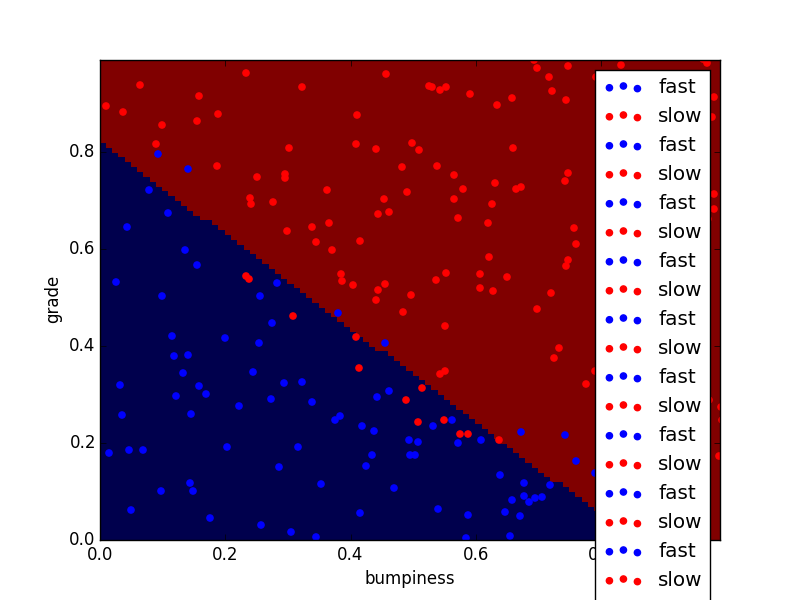

In [42]:
from sklearn.svm import SVC
clf = SVC(kernel="linear")

t0 = time()
clf.fit(features_train, labels_train)

t1 = time()
pred = clf.predict(features_test)

###Use the classifier based on training data to make prediction
pred = clf.predict(features_test)

###Compare test labels of fast and slow to prediction using classifier
accuracy = accuracy_score(labels_test, pred)

pred_time = round(time()-t1, 3)

print "Training time: ", t1-t0, "s"
print "Prediction time: ", pred_time, "s"

accuracy = accuracy_score(labels_test, pred)
print "SVM (linear kernal) accuracy:", accuracy, "\n" 

### draw the decision boundary with the text points overlaid by using function in class_vis.py
prettyPicture(clf, features_test, labels_test)

from IPython.display import Image
Image(filename ="test.png")

Let's try using the RBF kernel with high C value and see if there is any performance improvement

Training time:  1.15625309944 s
Prediction time:  0.001 s
SVM (RFB kernal, C = 1000000) accuracy: 0.948 



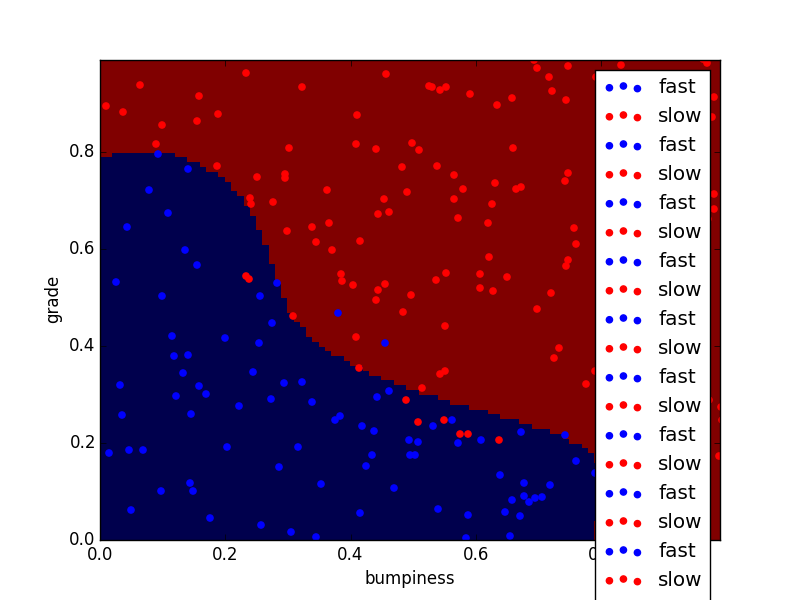

In [50]:
clf = SVC(kernel="rbf", C = 1000000)

t0 = time()
clf.fit(features_train, labels_train)

t1 = time()
pred = clf.predict(features_test)

###Compare test labels of fast and slow to prediction using classifier
accuracy = accuracy_score(labels_test, pred)

pred_time = round(time()-t1, 3)

print "Training time: ", t1-t0, "s"
print "Prediction time: ", pred_time, "s"

accuracy = accuracy_score(labels_test, pred)
print "SVM (RFB kernal, C = 1000000) accuracy:", accuracy, "\n" 

### draw the decision boundary with the text points overlaid by using function in class_vis.py
prettyPicture(clf, features_test, labels_test)

from IPython.display import Image
Image(filename ="test.png")

## Try using Adaboost Classifier

Training time:  0.0547649860382 s
Prediction time:  0.007 s
Adaboost accuracy: 0.924 



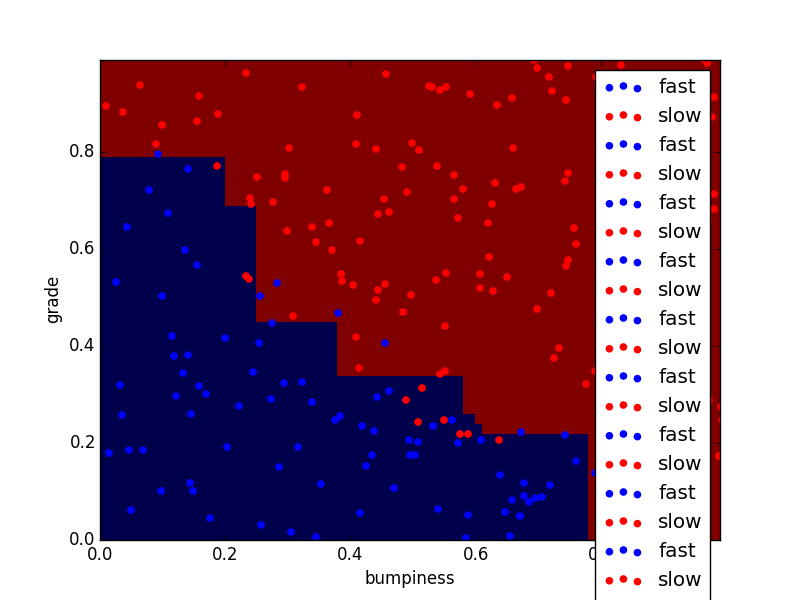

In [51]:
from sklearn.ensemble import AdaBoostClassifier
from time import time

clf = AdaBoostClassifier()

t0 = time()
clf.fit(features_train, labels_train)

t1 = time()
pred = clf.predict(features_test)

pred_time = round(time()-t1, 3)

print "Training time: ", t1-t0, "s"
print "Prediction time: ", pred_time, "s"

accuracy = accuracy_score(labels_test, pred)

print "Adaboost accuracy:", accuracy, "\n" 

prettyPicture(clf, features_test, labels_test)

from IPython.display import Image
Image(filename ="test.png")

## Try using Random Forest Classifier

Training time:  0.0118119716644 s
Prediction time:  0.001 s
Random Forest accuracy (Entropy criteria): 0.928 



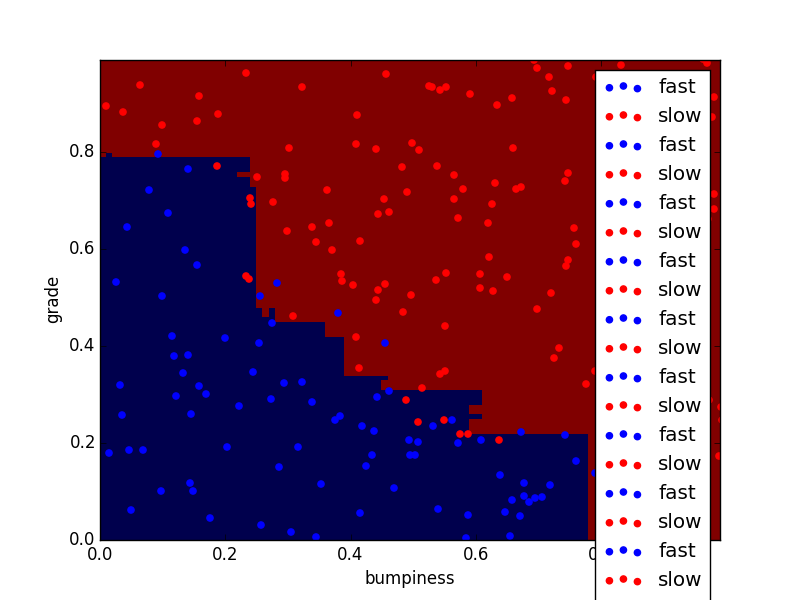

In [53]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(criterion = "entropy", min_samples_leaf = 3)

t0 = time()
clf.fit(features_train, labels_train)

t1 = time()
pred = clf.predict(features_test)

pred_time = round(time()-t1, 3)

print "Training time: ", t1-t0, "s"
print "Prediction time: ", pred_time, "s"

accuracy = accuracy_score(labels_test, pred)

print "Random Forest accuracy (Entropy criteria):", accuracy, "\n" 

prettyPicture(clf, features_test, labels_test)

from IPython.display import Image
Image(filename ="test.png")

## KNN Classifier 

Training time:  0.0012629032135 s
Prediction time:  0.001 s
KNN accuracy (K=4): 0.94 



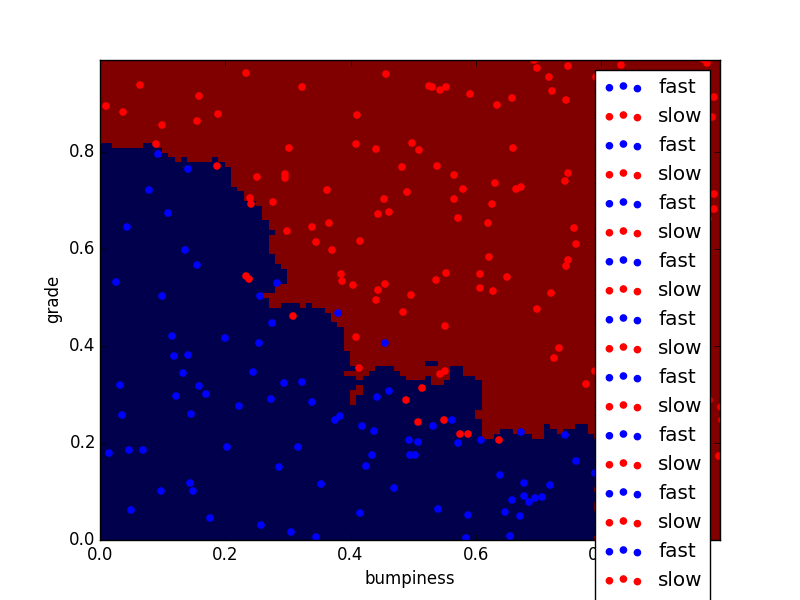

In [54]:
from sklearn.neighbors import KNeighborsClassifier 

clf = KNeighborsClassifier(n_neighbors=4)

t0 = time()
clf.fit(features_train, labels_train)

t1 = time()
pred = clf.predict(features_test)

pred_time = round(time()-t1, 3)

print "Training time: ", t1-t0, "s"
print "Prediction time: ", pred_time, "s"

accuracy = accuracy_score(labels_test, pred)

print "KNN accuracy (K=4):", accuracy, "\n" 

prettyPicture(clf, features_test, labels_test)

from IPython.display import Image
Image(filename ="test.png")

<b>Takeaway</b>: 

1) The most accurage model in this case is SVM with RBF kernal and C = 1000000, which yielded an accuracy at 94.8%; however, the training time is significantly higher than the other models (~200x than the average of other models). 

2) KNN model is very easy to use and did not require much tuning; the training time was one of the quickest with good accuracy.


<hr>

<b>Author</b>: Ian Xuan Xiao
<b>LinkedIn</b>: https://ca.linkedin.com/in/ianxiao
<b>Blog</b>: http://datasciensediary.tumblr.com/